In [1]:
# Import required libraries
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline

# import from prml library
import sys
sys.path.append("/Users/apple/Documents/Courses/Machine Learning Youtube 2020/Codes/")

from prml.preprocess import GaussianFeature, PolynomialFeature, SigmoidalFeature
from prml.linear import (
    BayesianRegression,
    EmpiricalBayesRegression,
    LinearRegression,
    RidgeRegression
)

# intialize a random seed for reproduce the results
np.random.seed(1234)

In [2]:
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    # create equally space points within the domain of the func
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x) # randomly shuffle the points
    # output is some function (func) of input points (x) + random normal noise
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

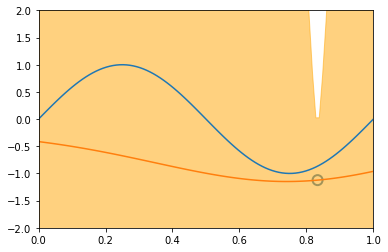

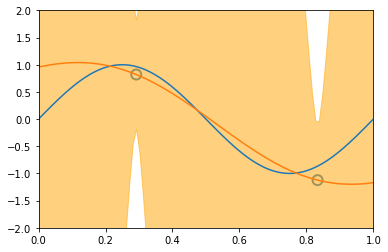

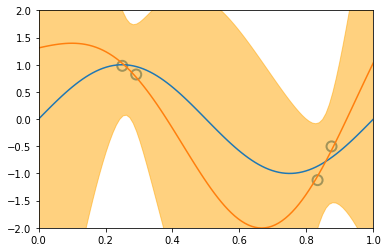

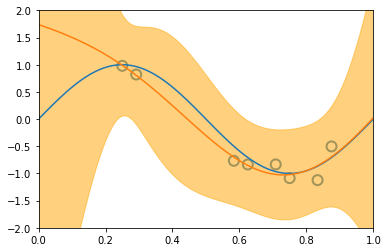

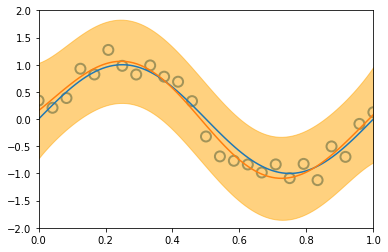

In [6]:
def sinusoidal(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(sinusoidal, 25, 0.25)
x_test = np.linspace(0,1,100)
y_test = sinusoidal(x_test)

feature = GaussianFeature(np.linspace(0,1,9), 0.1)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = BayesianRegression(alpha = 1e-3, beta = 2.)

for begin, end in [[0,1],[1,2],[2,4],[4,8],[8,25]]:
    model.fit(X_train[begin:end], y_train[begin:end])
    y, y_std = model.predict(X_test, return_std = True)
    
    plt.scatter(x_train[:end], y_train[:end], s= 100, facecolor ="none", edgecolor ="steelblue", lw=2)
    plt.plot(x_test, y_test)
    plt.plot(x_test, y)
    plt.fill_between(x_test, y - y_std, y + y_std, color = "orange", alpha = 0.5)
    plt.xlim(0,1)
    plt.ylim(-2,2)
    plt.show()